# Statistical Pattern Recognition: Assignment 1
**Praveen Kumar N (201082001)**

# Problem 1
Sample n=100, 1000, 10000 points from
(a) Uniform Distribution in 0 to 1.
(b) Gaussian Distribution with mean 0 and variance 1.
(c) Exponential Distribution with rate parameter = 1.
Verify if the points are generated according to the respective distribution by plotting
a histogram of the fraction of points in each case. Label graph properly.

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Javascript
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

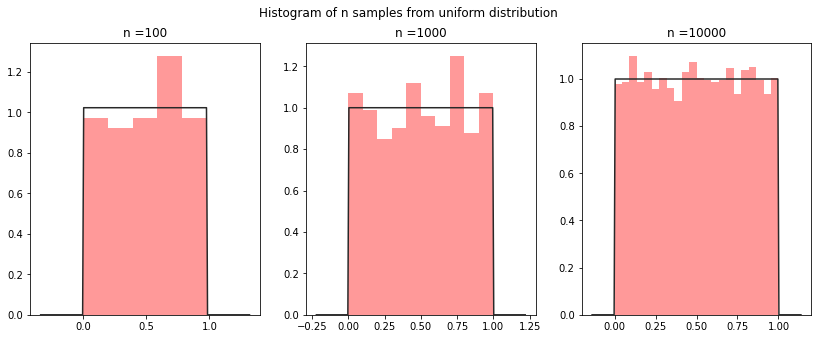

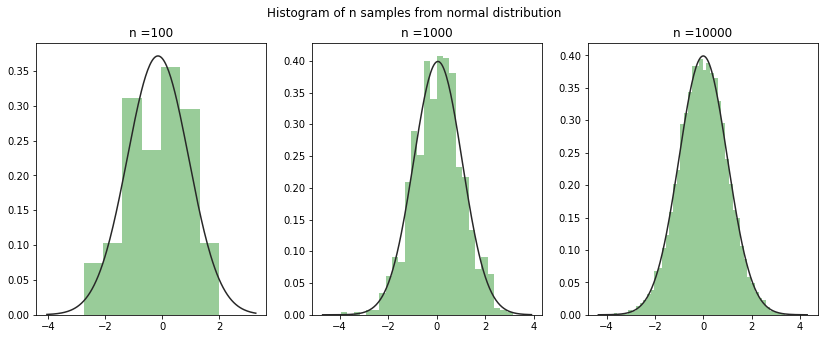

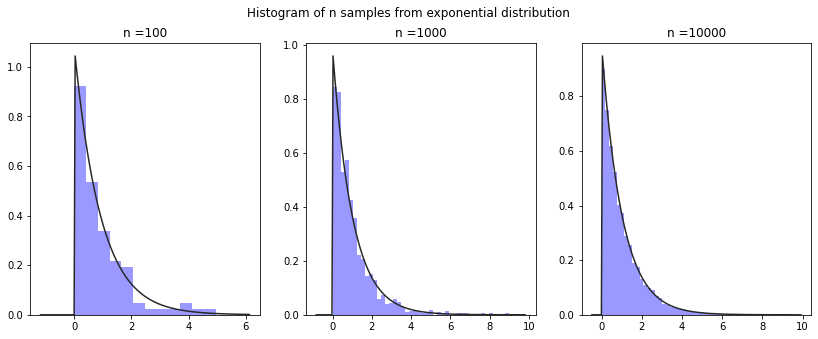

In [6]:
num_samp = [100,1000,10000]            # number of samples

# samples from uniform distribution in 0 to 1

fig,axes=plt.subplots(1,len(num_samp),figsize=(14,5))
fig.suptitle("Histogram of n samples from uniform distribution")

for i in range(len(num_samp)): 
    n = num_samp[i]
    uni_samp = np.random.rand(n)       # n samples from unifrom distribution
    sns.distplot(uni_samp, ax=axes[i], color='r', fit=stats.uniform, kde=False)
    axes[i].set_title("n ={}".format(n))  
plt.show()
    
# samples from Gaussian distribution with mean 0 and variance 1

fig,axes=plt.subplots(1,len(num_samp),figsize=(14,5))
fig.suptitle("Histogram of n samples from normal distribution")

for i in range(len(num_samp)): 
    n = num_samp[i]
    gauss_samp = np.random.randn(n)       # n samples from normal distribution
    sns.distplot(gauss_samp, ax=axes[i], color='g', fit=stats.norm, kde=False)
    axes[i].set_title("n ={}".format(n)) 
plt.show()    

# samples from Exponential distribution with parameter 1

fig,axes=plt.subplots(1,len(num_samp),figsize=(14,5))
fig.suptitle("Histogram of n samples from exponential distribution")

for i in range(len(num_samp)): 
    n = num_samp[i]
    exp_samp = np.random.exponential(1,n)  # n samples from exponential distribution
    sns.distplot(exp_samp, ax=axes[i], color='b', fit=stats.expon, kde=False)
    axes[i].set_title("n ={}".format(n)) 
plt.show()    
        



# Problem 2
Assume a unit circle centered at (0,0). Let n = 2; 3; 5 points be uniformly sampled
from the circumference of the circle. Write a python program to estimate the probability of n = 2; 3; 5 points lie within some semi-circle.

In [7]:
n_iter     = 50000   # Number of iterations to estimate the probability
n_samp     = [2,3,5] # number of points to be sampled from the circumference
est_probs  = []      # list of estimated probabilities
tru_probs  = []      # list of true probabilities 
        
for n in n_samp:
    
    tru_probs.append((n/2**(n-1)))           # computing true probability, p = n*(1/2)^(n-1)
    n_suc = 0                                # number of successes indicating number of times 
                                             # we get all n points lying on same semicircle
    for _ in range(n_iter):
        
        samp_theta  = np.random.uniform(0,2*np.pi,n) # sampling n points(represented by its angle) 
                                                     # from the circumference uniformly
             
        
        # Checking whether these n points lie on same semicircle
        
        samp_theta_min = np.min(samp_theta,initial=2*np.pi,where=samp_theta>np.pi)
        samp_theta  = ((2*np.pi-samp_theta_min)+samp_theta)%(2*np.pi)
        samp_theta  = np.where(samp_theta>np.pi,samp_theta-2*np.pi,samp_theta) 
        samp_theta.sort() 
        theta_diffs = np.ediff1d(samp_theta)
        # for these n points to be in same semicircle sum of the angles 
        # between consecutive points should not cross pi or 180 degrees
        if np.sum(theta_diffs)<=np.pi:
            n_suc = n_suc+1
                    
    est_probs.append(n_suc/n_iter)            # estimated probability = no. of successes/ no. of iterations
    
print("True probabilities:",tru_probs) 
print("Estimated probabilities:",est_probs)
            
        

True probabilities: [1.0, 0.75, 0.3125]
Estimated probabilities: [1.0, 0.75028, 0.31334]


# Problem 3
Assume two classes male and female. The height of the male class is distributed
according to the normal distribution with a mean of 5.8 feet and a standard deviation
of 1 feet and the height of the female class is distributed with a mean of 5 feet and a
standard deviation of 1 feet.
Assume following prior probabilities for two classes
(a) For Male 0.5 and for Female 0.5.
(b) For Male 0.1 and for Female 0.9.
For each of the above cases, specify the priors, plot the class conditional densities
and posterior probabilities of both the classes.Compute
the misclassification error. Draw the decision boundary for the Bayes classifier.

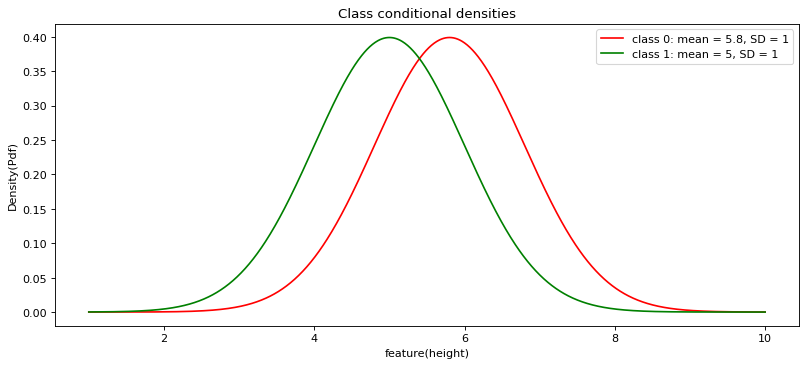

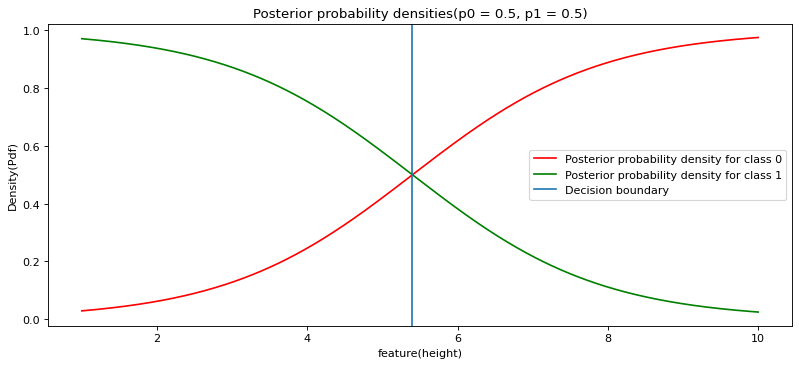

CASE A : p0 = 0.5, p1 = 0.5
Decision boundary for Bayes classifier : 5.4
Missclassification error : 0.3445782583896759


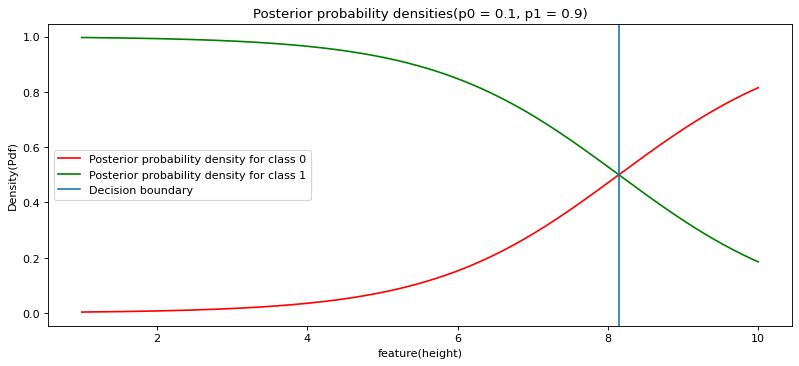

CASE B : p0 = 0.1, p1 = 0.9
Decision boundary for Bayes classifier : 8.146530721670276
Missclassification error : 0.0997960343653087


In [8]:
# feature(x)                  : height
# classes(w)                  : male(class 0) , female(class 1)
# prior probablities          : p0 = Pr{class = 0} , p1 = Pr{class = 1}
# class conditional densities : f0(x) = fx(x/class = 0) , 
#                               f1(x) = fx(x/class = 1)
# posterior probabilities     : Pr{class = 0/x} = q0(x) = fx(x/class = 0)*Pr{class = 0}/fx(x) = p0*f0(x)/fx(x) , 
#                               Pr{class = 1/x} = q1(x) = fx(x/class = 1)*Pr{class = 1}/fx(x) = p1*f1(x)/fx(x)
# fx(x) = p0*f0(x) + p1*f1(x)
# classification              : x>= decision boundary => class = 1
#                               x<  decision boundary => class = 0


mean_m = 5.8  # mean height of male class 
SD_m   = 1    # standard deviation of male class
mean_f = 5    # mean height of female class
SD_f   = 1    # standard deviation of female class

# plot of class conditional densities

x    = np.linspace(1,10,1000)          # taking 1000 features in the range [1,10] 
f0_x = stats.norm.pdf(x,mean_m,SD_m)   # class conditional density for class = 0
f1_x = stats.norm.pdf(x,mean_f,SD_f)   # class conditional density for class = 1
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(x,f0_x,'r')
plt.plot(x,f1_x,'g')
plt.legend(["class 0: mean = {}, SD = {}".format(mean_m,SD_m),"class 1: mean = {}, SD = {}".format(mean_f,SD_f)])
plt.title("Class conditional densities")
plt.xlabel("feature(height)"); plt.ylabel("Density(Pdf)")
plt.show()

#------------------------------ CASE A ----------------------------------------

# Prior probabilities
p0 = m_prior = 0.5 # prior probability of male class
p1 = f_prior = 0.5 # prior probability of female class

# computing posterior probabilities

fx_x = [p0*f0_x[i]+p1*f1_x[i] for i in range(1000)]
q0_x = f0_x*p0/fx_x
q1_x = f1_x*p1/fx_x

class_0 = []
class_1 = []

for i in range(1000):
    # splitting features based on classes they belong to
    if q0_x[i]>=q1_x[i]:
        class_0.append(x[i])
    else:
        class_1.append(x[i])
        

# Computing decision boundary

dec_boundry = (mean_m+mean_f)/2   
# decision boundary for normal class conditional densities
# with different mean and same variance and p0=p1=1/2        
               
# plot of posterior probabilities    

plt.figure(figsize=(12, 5), dpi=80)
plt.plot(x,q0_x,'r')
plt.plot(x,q1_x,'g')
plt.axvline(dec_boundry)
plt.legend(["Posterior probability density for class 0","Posterior probability density for class 1","Decision boundary"])
plt.title("Posterior probability densities(p0 = {}, p1 = {})".format(p0,p1))
plt.xlabel("feature(height)"); plt.ylabel("Density(Pdf)")
plt.show()


# Computing misclassification error 

mis_error   = p1*stats.norm.sf(dec_boundry,loc=mean_f,scale=SD_f) + p0*stats.norm.cdf(dec_boundry,loc=mean_m,scale=SD_m)
print("CASE A : p0 = {}, p1 = {}".format(p0,p1))
print("Decision boundary for Bayes classifier : {}".format(dec_boundry))
print("Missclassification error : {}".format(mis_error))
        
#------------------------------ CASE B ----------------------------------------

# Prior probabilities
p0 = m_prior = 0.1 # prior probability of male class
p1 = f_prior = 0.9 # prior probability of female class

# Computing posterior probabilities

fx_x = [p0*f0_x[i]+p1*f1_x[i] for i in range(1000)]
q0_x = f0_x*p0/fx_x
q1_x = f1_x*p1/fx_x

class_0 = []
class_1 = []

for i in range(1000):
    # splitting features based on classes they belong to
    if q0_x[i]>=q1_x[i]:
        class_0.append(x[i])
    else:
        class_1.append(x[i])
        

# Computing decision boundary
        
dec_boundry = (mean_m+mean_f)/2 - ((SD_m)**2 * np.log(p1/p0))/(mean_f-mean_m) 
# decision boundary for normal class conditional densities
# with different mean and same variance and p0=0.1,p1=0.9        
                       
# plot of posterior probabilities    

plt.figure(figsize=(12, 5), dpi=80)
plt.plot(x,q0_x,'r')
plt.plot(x,q1_x,'g')
plt.axvline(dec_boundry)
plt.legend(["Posterior probability density for class 0","Posterior probability density for class 1","Decision boundary"])
plt.title("Posterior probability densities(p0 = {}, p1 = {})".format(p0,p1))
plt.xlabel("feature(height)"); plt.ylabel("Density(Pdf)")
plt.show()

# Computing misclassification error 

mis_error   = p1*stats.norm.sf(dec_boundry,loc=mean_f,scale=SD_f) + p0*stats.norm.cdf(dec_boundry,loc=mean_m,scale=SD_m) 
print("CASE B : p0 = {}, p1 = {}".format(p0,p1))
print("Decision boundary for Bayes classifier : {}".format(dec_boundry))
print("Missclassification error : {}".format(mis_error))
    
    

